In [1]:
from tkinter import *
import PIL
from PIL import Image, ImageTk, ImageDraw
import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt
from edge_detection_function.polygon_crop import *

In [5]:
path = "edge_detection_function/Data/omg.jpg"
cs = polygon_select(path)

click on x: 300 y: 203
click on x: 270 y: 237
click on x: 292 y: 262
click on x: 301 y: 313
click on x: 297 y: 397
click on x: 274 y: 455
click on x: 264 y: 618
click on x: 386 y: 637
click on x: 422 y: 358
click on x: 341 y: 200


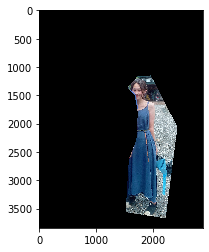

In [6]:
newim = polygon_crop(path, cs)
# cv2.imshow('image',newim)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(newim)
plt.show()

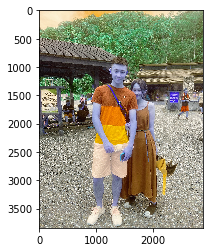

In [5]:
path = "edge_detection_function/Data/omg.jpg"
# img = Image.imread(path)
# img = np.array(img)
img = cv2.imread(path)
plt.imshow(img)
plt.show()

In [18]:
img = Image.open("Data/pill.jpg").convert('L')
gray = np.asarray(img)


In [9]:
a,b,_ = img.shape
a

3840

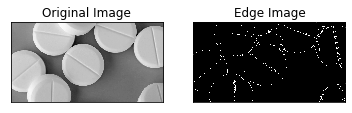

In [35]:
edges = cv.Canny(gray,5,30)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# import the necessary packages

import argparse
import cv2
from PIL import Image, ImageTk

# construct the argument parser and parse the arguments

# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "-image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread("Data/out.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (1000, 800), interpolation=cv2.INTER_CUBIC)
# gray = gray.resize((1000, 800), Image.ANTIALIAS)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
print(gray.shape)
# show the original and blurred images
cv2.imshow("Original", image)
cv2.imshow("Blurred", blurred)

# compute a "wide", "mid-range", and "tight" threshold for the edges

wide = cv2.Canny(blurred, 10, 200)
mid = cv2.Canny(blurred, 30, 150)
tight = cv2.Canny(blurred, 240, 250)

# show the edge maps

cv2.imshow("Wide Edge Map", wide)
cv2.imshow("Mid Edge Map", mid)
cv2.imshow("Tight Edge Map", tight)
cv2.waitKey(0)

(800, 1000)


In [23]:
image = cv.imread("Data/out.png")
cv.imshow("Original", image)

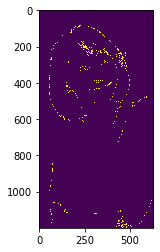

In [18]:
image = cv.imread("Data/aragaki_.jpg")
imgg = auto_canny(image,sigma = 1)
plt.imshow(imgg)


In [4]:
import tkinter as Tkinter
from PIL import Image, ImageTk
from sys import argv
import sys

window = Tkinter.Tk(className="bla")
cs = list()
basewidth = 500

image = Image.open("Data/omg2.jpg")

wratio = basewidth/image.size[0]
baselength = int(round(image.size[1]*wratio))

image = image.resize((basewidth, baselength), Image.ANTIALIAS)
print(image.size[0], image.size[1])
canvas = Tkinter.Canvas(window, width=image.size[0], height=image.size[1])
canvas.pack()
image_tk = ImageTk.PhotoImage(image)

canvas.create_image(image.size[0]//2, image.size[1]//2, image=image_tk)

def callback(event):
    print ("clicked at: "+ str(event.x), str(event.y))
    cs.append((int(round(event.x/wratio)), int(round(event.y/wratio))))

canvas.bind("<Button-1>", callback)
Tkinter.mainloop()
print(cs)

500 667
clicked at: 99 142
clicked at: 174 123
clicked at: 208 151
clicked at: 229 188
clicked at: 268 200
clicked at: 288 182
clicked at: 319 95
clicked at: 415 72
clicked at: 472 97
clicked at: 485 157
clicked at: 487 220
clicked at: 471 278
clicked at: 424 347
clicked at: 383 432
clicked at: 317 400
clicked at: 240 376
clicked at: 208 462
clicked at: 82 489
clicked at: 42 311
clicked at: 45 216
clicked at: 83 132
clicked at: 143 104
[(570, 818), (1002, 708), (1198, 870), (1319, 1083), (1544, 1152), (1659, 1048), (1837, 547), (2390, 415), (2719, 559), (2794, 904), (2805, 1267), (2713, 1601), (2442, 1999), (2206, 2488), (1826, 2304), (1382, 2166), (1198, 2661), (472, 2817), (242, 1791), (259, 1244), (478, 760), (824, 599)]


In [11]:
polygon = cs
# im = image
im = Image.open("Data/omg2.jpg").convert("RGBA")
imArray = np.asarray(im)

maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)
mask = np.array(maskIm)

# assemble new image (uint8: 0-255)
newImArray = np.empty(imArray.shape,dtype='uint8')

# colors (three first columns, RGB)
newImArray[:,:,:3] = imArray[:,:,:3]

# transparency (4th column)
newImArray[:,:,3] = mask*255

# back to Image from numpy
newIm = Image.fromarray(newImArray, "RGBA")
newIm.save("Data/crop.jpeg", "PNG")

In [20]:
im = Image.open("Data/crop.jpeg")
imArray = np.asarray(im)
mask[0][0]

0

In [5]:
# read image as RGB (without alpha)
img = Image.open("Data/omg2.jpg").convert("RGB")

# convert to numpy (for convenience)
img_array = np.asarray(img)

# create mask
polygon = cs

# create new image ("1-bit pixels, black and white", (width, height), "default color")
mask_img = Image.new('1', (img_array.shape[1], img_array.shape[0]), 0)

ImageDraw.Draw(mask_img).polygon(polygon, outline=1, fill=1)
mask = np.array(mask_img)

# assemble new image (uint8: 0-255)
new_img_array = np.empty(img_array.shape, dtype='uint8')

# copy color values (RGB)
new_img_array[:,:,:3] = img_array[:,:,:3]

# filtering image by mask
new_img_array[:,:,0] = new_img_array[:,:,0] * mask
new_img_array[:,:,1] = new_img_array[:,:,1] * mask
new_img_array[:,:,2] = new_img_array[:,:,2] * mask

# back to Image from numpy
newIm = Image.fromarray(new_img_array, "RGB")
newIm.save("Data/out.png")

In [12]:
cs = list()

# mouse callback function
def draw_circle(event,x,y,flags,param):

    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),5,(0,0,255),-1)
        cs.append((x,y))
        print("click on x: " + str(x) + " y: " + str(y))

img = cv2.imread(path)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

click on x: 436 y: 271
click on x: 477 y: 353
click on x: 568 y: 444
click on x: 918 y: 179


In [19]:
cs

[(99, 98), (96, 188)]

In [14]:
width = 200
height = 200
center = height//2
white = (255, 255, 255)
green = (0,128,0)

def save():
    filename = "image.png"
    image1.save(filename)

def paint(event):
    # python_green = "#476042"
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    cv.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="black",width=5)

root = Tk()

# Tkinter create a canvas to draw on
cv = Canvas(root, width=width, height=height, bg='white')
cv.pack()

# PIL create an empty image and draw object to draw on
# memory only, not visible
image1 = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(image1)

# do the Tkinter canvas drawings (visible)
# cv.create_line([0, center, width, center], fill='green')

cv.pack(expand=YES, fill=BOTH)
cv.bind("<B1-Motion>", paint)

# do the PIL image/draw (in memory) drawings
# draw.line([0, center, width, center], green)

# PIL image can be saved as .png .jpg .gif or .bmp file (among others)
# filename = "my_drawing.png"
# image1.save(filename)
button=Button(text="save",command=save)
button.pack()
root.mainloop()